## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [12]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points
from shapely.ops import unary_union

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

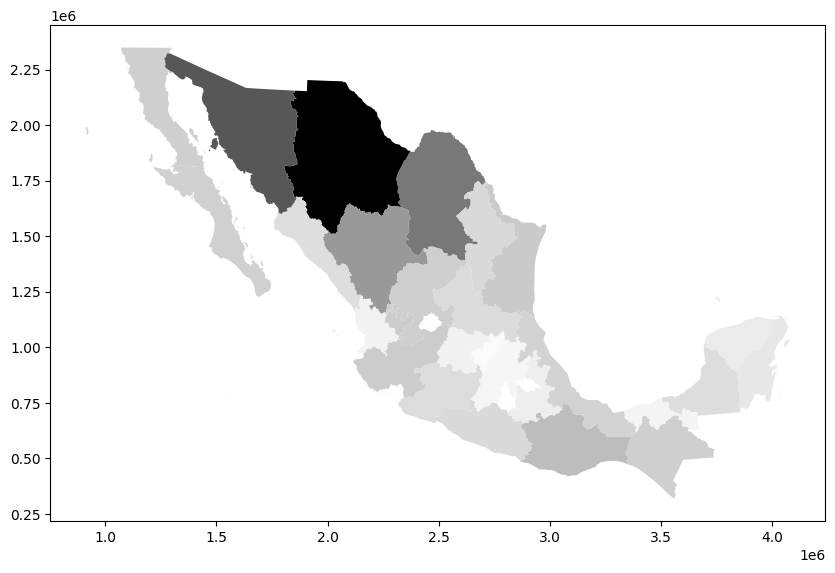

In [7]:
estados = gpd.read_file('Estados/conjunto_de_datos')
estados['area'] = estados.geometry.area
estados['normalized_area'] = (estados['area'] - estados['area'].min()) / (estados['area'].max() - estados['area'].min())
cmap = plt.cm.Greys
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.plot(ax=ax, column='normalized_area', cmap=cmap, legend=False)

plt.show()

#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [17]:
# escuelas = gpd.read_file('Escuelas/conjunto_de_datos/denue_inegi_61_.shp')

# escuelas = escuelas.to_crs(epsg=6362)
# escuelas['buffer'] = escuelas['geometry'].buffer(5000)  # 5000 metros = 5 km

# buffers_union = escuelas['buffer'].unary_union
# buffers_union.area
#total_area_escuelas = buffers_union.area

# estados_gdf = gpd.read_file('Estados/conjunto_de_datos/00ent.shp')
# estados_gdf = estados_gdf.to_crs(epsg=6362)  # Cambia el EPSG según tu zona
# estados_gdf['area'] = estados_gdf['geometry'].area
# area_total_pais = estados_gdf['area'].sum()

# print(f"Área total ocupada por las escuelas (con buffers de 5 km): {total_area_escuelas} m²")
# print(f"Área total del país: {area_total_pais} m²")
# print(f"Porcentaje del área ocupada por escuelas: {(total_area_escuelas / area_total_pais) * 100:.4f}%")


estados = gpd.read_file('Estados/conjunto_de_datos')
escuelas = gpd.read_file('Escuelas/conjunto_de_datos/denue_inegi_61_.shp')

escuelas = escuelas.to_crs(epsg=6362)
escuelas['buffer'] = escuelas['geometry'].buffer(5000)

escuelas_union = unary_union(escuelas['buffer'])
estados_union = unary_union(estados['geometry'])

interseccion = estados_union.intersection(escuelas_union)

interseccion_gdf = gpd.GeoDataFrame(geometry=[interseccion], crs=escuelas.crs)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

estados.plot(ax=ax, color='lightgray', alpha=0.5, edgecolor='k')
interseccion_gdf.plot(ax=ax, color='green')

plt.show()
print(f'El área del país cubierta por un radio de 5km de las escuelas es de {interseccion_gdf[geometry].area} km2')


KeyboardInterrupt: 

#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [16]:
centroide_CDMX = estados[estados["NOMGEO"] == 'Ciudad de México']['geometry'].centroid.iloc[0]

distancias = {}
for index, row in estados.iterrows():
    if row['NOMGEO'] != 'Ciudad de México':
        estado_centroide = row['geometry'].centroid
        distancia = centroide_CDMX.distance(estado_centroide) / 1000  
        distancias[row['NOMGEO']] = distancia

# Imprimir las distancias
for estado, distancia in distancias.items():
    print(f"{estado}: {distancia:.4f} km")


Aguascalientes: 449.9105 km
Baja California: 2026.6514 km
Baja California Sur: 1505.0824 km
Campeche: 922.7211 km
Coahuila de Zaragoza: 931.1983 km
Colima: 522.2069 km
Chiapas: 770.6047 km
Chihuahua: 1285.3109 km
Durango: 858.9522 km
Guanajuato: 265.2595 km
Guerrero: 195.7746 km
Hidalgo: 135.1968 km
Jalisco: 488.6785 km
México: 53.8470 km
Michoacán de Ocampo: 287.5768 km
Morelos: 59.4500 km
Nayarit: 655.4318 km
Nuevo León: 698.3553 km
Oaxaca: 384.3340 km
Puebla: 133.4159 km
Querétaro: 189.0212 km
Quintana Roo: 1154.3310 km
San Luis Potosí: 387.6516 km
Sinaloa: 1064.0340 km
Sonora: 1642.2435 km
Tabasco: 705.2689 km
Tamaulipas: 554.0133 km
Tlaxcala: 103.0959 km
Veracruz de Ignacio de la Llave: 288.3719 km
Yucatán: 1076.8973 km
Zacatecas: 572.4074 km


#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

In [ ]:
servicios = gpd.read_file('Servicios/conjunto_de_datos')
servicios = servicios.to_crs(epsg=6372)
escuelas_filtradas = escuelas[
    escuelas['nombre_act'].str.contains(r"(?i)(primaria|escuela básica|escuela elemental)") |
    escuelas['nombre_act'].str.contains(r"(?i)(secundaria|escuela media|educación media)") |
    escuelas['nombre_act'].str.contains(r"(?i)(preparatoria|bachillerato|prepa|colegio)")
]
fig, ax = plt.subplots(figsize=(10, 10))
estados.plot(ax=ax, color='lightgrey')
escuelas_filtradas.plot(ax=ax, color='green', markersize=10, label='Escuelas')
servicios.plot(ax=ax, color='cyan', markersize=10, label='Servicios')
ax.legend()
plt.show()